<a href="https://colab.research.google.com/github/agrim-sri/IITD-AIA_FSM/blob/main/supervised_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Data

In [ ]:
import numpy as np
import pandas as pd
import torch

In [24]:
# Load the dataset
df = pd.read_csv('Medical Price Dataset.csv')

# Extract the features and target variable
X = df[['age', 'bmi', 'children']].values
y = df['charges'].values

# Create inputs and targets arrays
inputs = X
targets = y.reshape(-1, 1)  # Reshape y to have one column

# Verify the shapes
print("Shape of inputs:", inputs.shape)
print("Shape of targets:", targets.shape)

Shape of inputs: (1338, 3)
Shape of targets: (1338, 1)


In [25]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[19.0000, 27.9000,  0.0000],
        [18.0000, 33.7700,  1.0000],
        [28.0000, 33.0000,  3.0000],
        ...,
        [18.0000, 36.8500,  0.0000],
        [21.0000, 25.8000,  0.0000],
        [61.0000, 29.0700,  0.0000]], dtype=torch.float64)
tensor([[16884.9240],
        [ 1725.5523],
        [ 4449.4620],
        ...,
        [ 1629.8335],
        [ 2007.9450],
        [29141.3603]], dtype=torch.float64)


# Linear regression model from scratch

In [27]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True, dtype=torch.double)
b = torch.randn(2, requires_grad=True, dtype=torch.double)
print(w)
print(b)

tensor([[ 0.0844,  0.3787,  1.7217],
        [-0.8812,  1.6366, -0.6432]], dtype=torch.float64, requires_grad=True)
tensor([ 0.5831, -0.2462], dtype=torch.float64, requires_grad=True)


In [28]:
predic = inputs @ w.t() + b
print(predic)

tensor([[12.7515, 28.6702],
        [16.6118, 38.5149],
        [20.6073, 27.1560],
        ...,
        [16.0564, 44.1987],
        [12.1250, 23.4709],
        [16.7379, -6.4273]], dtype=torch.float64, grad_fn=<AddBackward0>)


In [29]:
def model(x):
    return x @ w.t() + b

In [30]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[12.7515, 28.6702],
        [16.6118, 38.5149],
        [20.6073, 27.1560],
        ...,
        [16.0564, 44.1987],
        [12.1250, 23.4709],
        [16.7379, -6.4273]], dtype=torch.float64, grad_fn=<AddBackward0>)


In [31]:
# Compare with targets
print(targets)

tensor([[16884.9240],
        [ 1725.5523],
        [ 4449.4620],
        ...,
        [ 1629.8335],
        [ 2007.9450],
        [29141.3603]], dtype=torch.float64)


# Loss Function

In [32]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [33]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(3.2223e+08, dtype=torch.float64, grad_fn=<DivBackward0>)


# Compute gradients

In [34]:
# Compute gradients
loss.backward()

In [35]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.0844,  0.3787,  1.7217],
        [-0.8812,  1.6366, -0.6432]], dtype=torch.float64, requires_grad=True)
tensor([[-570427.4134, -421004.3871,  -15500.3191],
        [-570713.9396, -421049.8982,  -15507.2930]], dtype=torch.float64)


# Adjust weights and biases to reduce the loss

In [36]:
w
w.grad

tensor([[-570427.4134, -421004.3871,  -15500.3191],
        [-570713.9396, -421049.8982,  -15507.2930]], dtype=torch.float64)

In [37]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [38]:
print(w)
print(b)

tensor([[ 5.7886,  4.5887,  1.8767],
        [ 4.8259,  5.8471, -0.4881]], dtype=torch.float64, requires_grad=True)
tensor([ 0.7156, -0.1137], dtype=torch.float64, requires_grad=True)


In [39]:
# verifying that the loss is actually lower
loss = mse(preds, targets)
print(loss)

tensor(3.2223e+08, dtype=torch.float64, grad_fn=<DivBackward0>)


In [40]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)
tensor([0., 0.], dtype=torch.float64)


# Train the model using gradient descent

In [41]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[238.7255, 254.7113],
        [261.7495, 283.7196],
        [319.8560, 326.5002],
        ...,
        [274.0060, 302.2166],
        [240.6664, 252.0843],
        [487.2171, 464.2399]], dtype=torch.float64, grad_fn=<AddBackward0>)


In [42]:
# Calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(3.1230e+08, dtype=torch.float64, grad_fn=<DivBackward0>)


In [43]:
# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[-555420.9161, -409969.0298,  -15109.0451],
        [-555701.9171, -410010.6214,  -15115.8784]], dtype=torch.float64)
tensor([-12899.9903, -12902.5706], dtype=torch.float64)


In [44]:
# Adjust weights & reset gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [45]:
print(w)
print(b)

tensor([[11.3428,  8.6884,  2.0278],
        [10.3829,  9.9472, -0.3369]], dtype=torch.float64, requires_grad=True)
tensor([0.8446, 0.0153], dtype=torch.float64, requires_grad=True)


In [46]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(3.0288e+08, dtype=torch.float64, grad_fn=<DivBackward0>)


In [47]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [48]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(1.3153e+08, dtype=torch.float64, grad_fn=<DivBackward0>)


In [49]:
# Predictions
preds

tensor([[ 8053.1301,  8070.5071],
        [ 8742.7227,  8765.6409],
        [10665.5791, 10674.6970],
        ...,
        [ 9199.0910,  9228.0894],
        [ 8141.4822,  8154.6940],
        [16728.4614, 16713.0295]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [50]:
# Targets
targets

tensor([[16884.9240],
        [ 1725.5523],
        [ 4449.4620],
        ...,
        [ 1629.8335],
        [ 2007.9450],
        [29141.3603]], dtype=torch.float64)

# M2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
def linear_regression(x_train, y_train, learning_rate=0.01, num_iterations=1000):
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.concatenate((ones, x_train), axis=1)

    num_features = x_train.shape[1]
    theta = np.zeros(num_features)

    # gradient descent
    for _ in range(num_iterations):
        predictions = np.dot(x_train, theta)
        errors = predictions - y_train
        gradient = np.dot(x_train.T, errors) / len(y_train)
        theta -= learning_rate * gradient

    return theta

In [52]:
def plot_regression_line(x, y, theta):
    # training data
    plt.scatter(x, y, color='blue', label='Training Data')

    # Predict y
    y_pred = theta[0] + theta[1] * x

    # regression line
    plt.plot(x, y_pred, color='red', label='Regression Line')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')
    plt.legend()

    plt.show()

# Load the dataset

Extract the features and Target variable

In [53]:
x_train = df[['age', 'bmi', 'children']].values
y_train = df['charges'].values

In [54]:
df = pd.read_csv('Medical Price Dataset.csv')

# linear regression

In [ ]:
theta = linear_regression(x_train, y_train)


<ipython-input-2-d055fe9704bf>:15: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


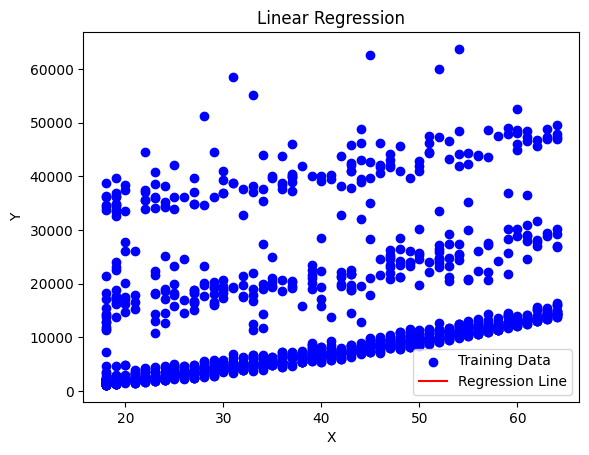

In [ ]:
plot_regression_line(x_train[:, 0], y_train, theta)

# linear regression using gradient descent

In [ ]:
learning_rate = 0.0001
num_iterations = 1000
theta = linear_regression(x_train, y_train, learning_rate, num_iterations)

In [ ]:
print("Learned Parameters:")
print("Intercept (theta0):", theta[0])
print("Slope (theta1):", theta[1:])
print()

Learned Parameters:
Intercept (theta0): -15.195788078334827
Slope (theta1): [208.41501147 171.33238101  61.01304996]



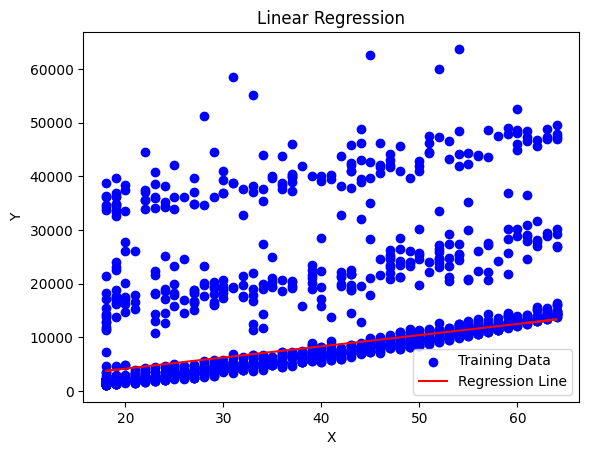

In [ ]:
plot_regression_line(x_train[:, 0], y_train, theta)